### Student Information
Name: Tran Anh Tuan (陈英俊)

Student ID: 61308022e

GitHub ID: tuanngond1

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [15]:
### Begin Assignment Here
# Environment setup
import pandas as pd
import numpy as np
import plotly as py
import math
import PAMI
import umap
from sklearn.feature_extraction.text import CountVectorizer

# Data loading
df = pd.read_csv("Reddit-stock-sentiment.csv")

In [16]:
# Attribute check
df.columns
# Data frame check - 10 first rows
df[0:10]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0
9,comment,2021-12-31 16:29:49,hqp3kt4,stockstobuytoday,Any cheap stocks under $10?,Zumuru,https://www.reddit.com/r/stockstobuytoday/comm...,2,NaN,NaN,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,"['HLGN', 'Hurry', 'moon']",1.0


In [17]:
# Simple Query
df[:10][["text","sentiment"]]

,text,sentiment
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,1.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,0.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
6,Trump will respond to china increasing their t...,-1.0
7,Confirmed not a trap. Its been like this for p...,1.0
8,Am I the only one seeing the cup & handle brea...,1.0
9,HLGN is $10. Hurry and catch it now before it ...,0.0


In [18]:
#Another way to query data from the data frame
df[(df['sentiment'] > 0) & (df['downvotes'] >0)]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
497,post,2025-04-11 2:58:02,1jwfydk,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,https://www.reddit.com/r/stocks/comments/1jwfy...,1105,11.0,0.99,\r\n\r\n> The 10-year Treasury yield climbed 6...,0.602273,0.005682,1.0,"['Treasurys', 'Trump', 'someone', 'issue', 'ba...",0.0


In [19]:
# Fetch positive comments only, every 5 comments, first 10 rows)
df[df['label']==1][::5][0:10]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
39,comment,2025-04-11 14:09:53,mmkdk5f,stocks,Formerly Stable US Treasuries Are Trading Like...,Lost-Panda-68,https://www.reddit.com/r/stocks/comments/1jwpf...,4,NaN,NaN,Other countries probably will go through a rec...,0.517857,0.049107,1.0,"['hyperinflation', 'reason', 'inflation', 'US'...",1.0
78,comment,2025-04-11 15:11:59,mmkq0pj,StockMarket,$ U.S. dollar value (crashing),AdQuick8612,https://i.redd.it/atvlo83gk4ue1.jpeg,1,NaN,NaN,I think it’s gonna work itself out. I bought t...,0.133333,-0.133333,-1.0,"['trading', 'app', 'gloom', 'doom', 'gon']",1.0
116,comment,2025-04-11 14:13:24,mmke8ye,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,badasimo,https://www.reddit.com/r/stocks/comments/1jwlr...,4,NaN,NaN,RKT is a crazy stock in general. Every dividen...,0.443750,-0.200000,-1.0,"['call', 'surprise', 'RKT', 'dividend', 'stock']",1.0
168,comment,2025-04-11 13:09:51,mmk2ho9,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,mazzaschi,https://www.reddit.com/r/stocks/comments/1jwlr...,1,NaN,NaN,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"['bond', 'U.S', 'dollar', '’', 'Fed', 'CNBC', ...",1.0
205,comment,2025-04-12 3:07:26,mmobqf0,wallstreetbets,Someone post the hotline please.,stockmarkettrader,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,Nicely done,1.000000,0.600000,1.0,[],1.0
219,comment,2023-08-12 2:20:58,jvtj2dl,stockstobuytoday,APLS stocks,muffins95,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Same. Back to break even after that last rip b...,0.300000,0.144444,1.0,"['rip', 'Same', 'Back', '%', 'thing']",1.0
266,comment,2025-04-11 21:22:20,mmmrtzq,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,OPINION_IS_REGARDED,https://www.reddit.com/r/wallstreetbets/commen...,22,NaN,NaN,I am so addicted to this market I can't wait f...,0.600000,-0.400000,-1.0,"['Monday', 'market']",1.0
319,comment,2021-02-01 14:44:17,gllpzay,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",inuvash255,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Etrade has a feed of news articles about how r...,0.000000,0.000000,0.0,"['news', 'actual-reddit', 'reddit', 'GME', 'Et...",1.0
343,comment,2025-04-10 18:24:33,mmfiuha,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,giggy13,https://www.reddit.com/r/stocks/comments/1j0w7...,1,NaN,NaN,r/CanadianInvestor would a better place to ask...,0.678571,-0.071429,-1.0,"['fund', 'one', 'US', 'economy', 'XEQT', 'time...",1.0


In [20]:
# Missing value check
df.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [21]:
# Missing value count
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [22]:
# In this case, the missing values are all in downvotes and upvote_ratio columns. After inspecting into the data in these columns, I do not think that these missing values can cause errors or and interventions in the subsequent process. Therefore, I will not conduct the process of cleaning missing values here.

In [23]:
# Duplication check
sum(df.duplicated())

0

In [24]:
# Sampling
df_sample = df.sample(n=100)

In [25]:
# Sample data frame check
df_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
164,comment,2025-04-11 13:58:46,mmkbdyy,StockMarket,The Trump administration is begging Xi Jinping...,SingularityCentral,https://edition.cnn.com/2025/04/10/politics/tr...,125,NaN,NaN,The bond market is also begging for that call....,0.6,-0.4,-1.0,"['Thing', 'P', 'bond', '..', 'call', 'S&P', 'm...",0.0
694,comment,2022-01-14 17:07:15,hsnf97n,stockstobuytoday,Technical Analysis Thread.,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,trending up\r\n\r\n[/](/),0.0,0.0,0.0,"['/', ']']",0.0
432,post,2025-04-11 16:01:14,1jwtejt,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
730,comment,2025-04-11 12:28:42,mmjvvnb,stocks,Is the market in complete denial right now?,SmallCapsOnly,https://www.reddit.com/r/stocks/comments/1jwo1...,1,NaN,NaN,A prefect time to start divesting into more in...,0.0,0.0,0.0,['time'],1.0


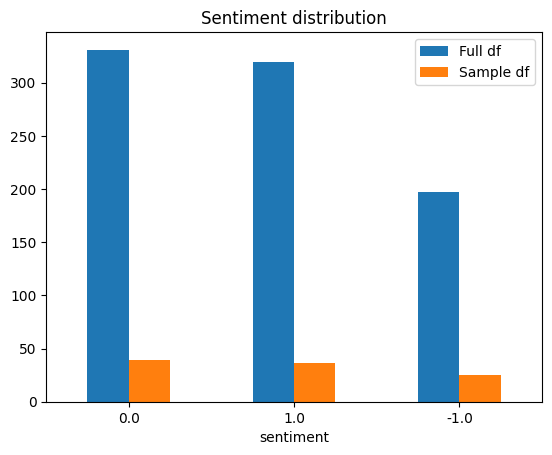

In [26]:
# Sentiment count in the original data frame & sample data frame
import matplotlib.pyplot as plt
df_compare = pd.DataFrame({
    'Full df': df['sentiment'].value_counts(),
    'Sample df': df_sample['sentiment'].value_counts()
}).fillna(0)
ax = df_compare.plot(kind='bar', title='Sentiment distribution')
ylim=[0,df_sample.sentiment.value_counts().max()+30]
plt.xticks(rotation=0)
plt.show()

In [27]:
# Text tokenization
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [28]:
df[0:4]['unigrams']

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [29]:
df[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
print(df_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [31]:
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

In [32]:
#Shape check
df_counts.shape

(847, 4346)

In [33]:
# Array transformation
df_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
# Visualization
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [35]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [36]:
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

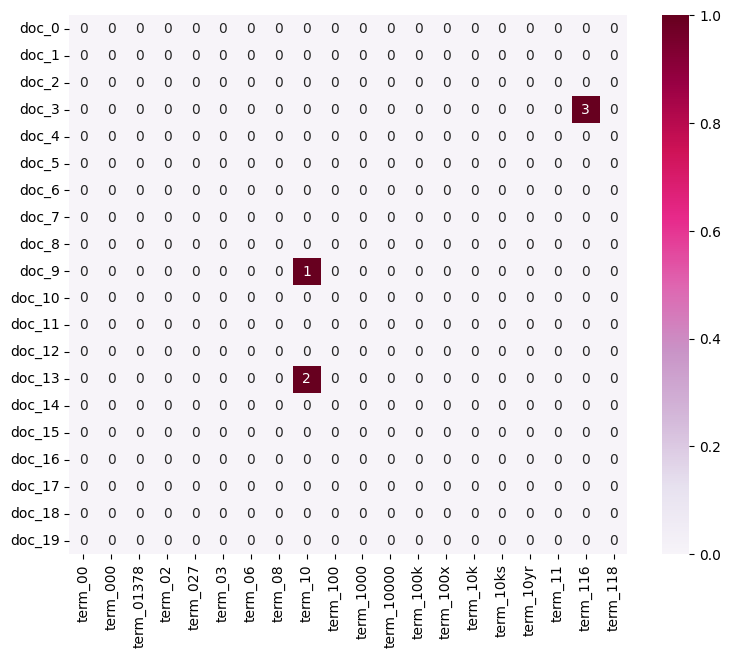

In [37]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

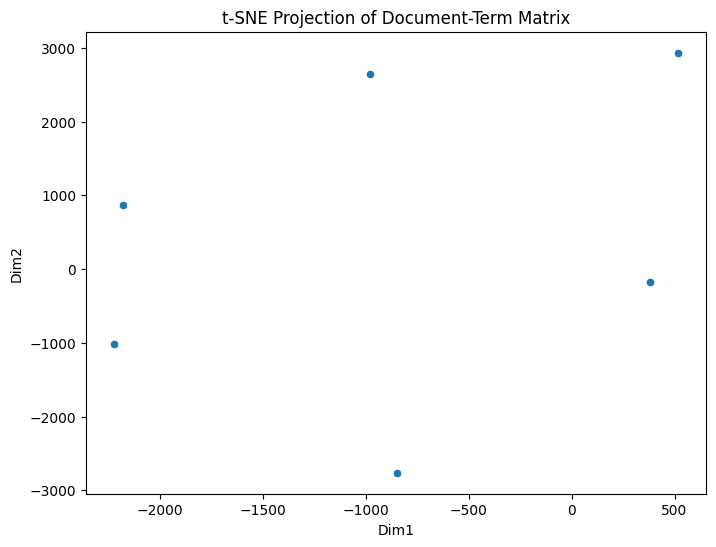

In [38]:
# Plot simplification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

new = df_todraw.copy()
scaler = StandardScaler(with_mean=False)
new_scaled = scaler.fit_transform(new)

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
new_tsne = tsne.fit_transform(new_scaled)

t_tsne = pd.DataFrame(new_tsne, columns=['Dim1', 'Dim2'], index=new.index)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Dim1', y='Dim2', data=t_tsne)
plt.title('t-SNE Projection of Document-Term Matrix')
plt.show()

In [39]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [40]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [41]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

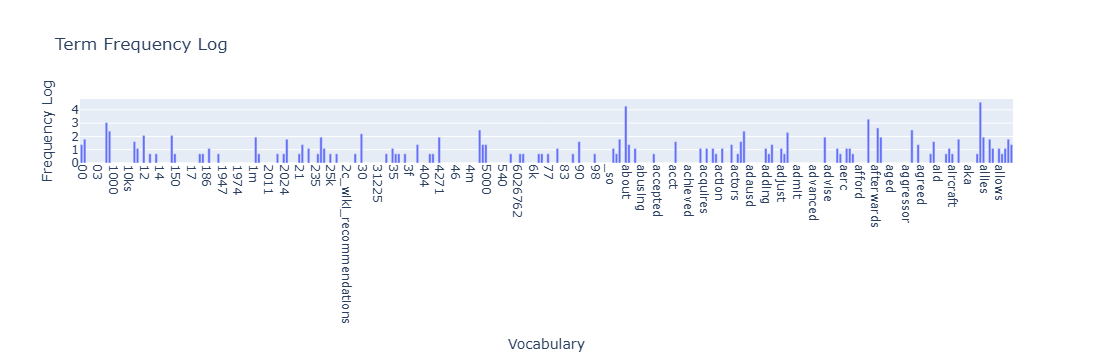

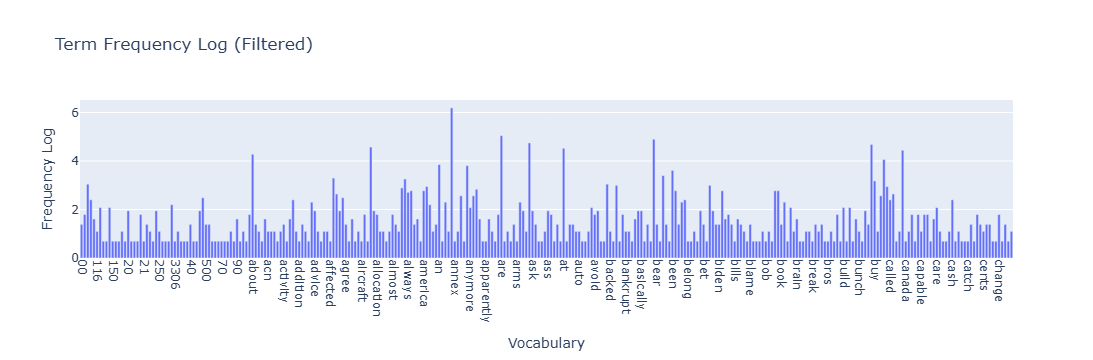

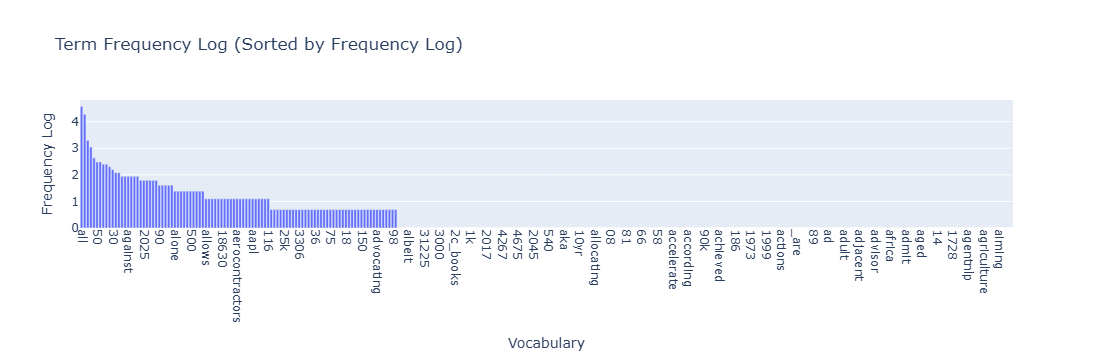

In [42]:
import plotly.express as px

data = {'Vocabulary': count_vect.get_feature_names_out()[:300], 'Frequency Log': term_frequencies_log[:300]}
fl = pd.DataFrame(data)

fig = px.bar(fl, x='Vocabulary', y='Frequency Log', title='Term Frequency Log')
fig.update_layout(xaxis_tickangle=90)
fig.show()

# Filter out terms with zero frequency
term_frequencies_log = np.array(term_frequencies_log)
non_zero_indices = term_frequencies_log > 0
filtered_terms = count_vect.get_feature_names_out()[non_zero_indices]
filtered_frequencies = term_frequencies_log[non_zero_indices]

# Create DataFrame
fl_f = {'Vocabulary': filtered_terms[:300], 'Frequency Log': filtered_frequencies[:300]}
flf = pd.DataFrame(fl_f)

# Create the plot
fig = px.bar(flf, x='Vocabulary', y='Frequency Log', title='Term Frequency Log (Filtered)')
fig.update_layout(xaxis_tickangle=90)
fig.show()

# Sort by frequency log in descending order
fl_sorted = fl.sort_values(by='Frequency Log', ascending=False)

# Create the plot
fig = px.bar(fl_sorted[:300], x='Vocabulary', y='Frequency Log', title='Term Frequency Log (Sorted by Frequency Log)')
fig.update_layout(xaxis_tickangle=90)
fig.show()

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

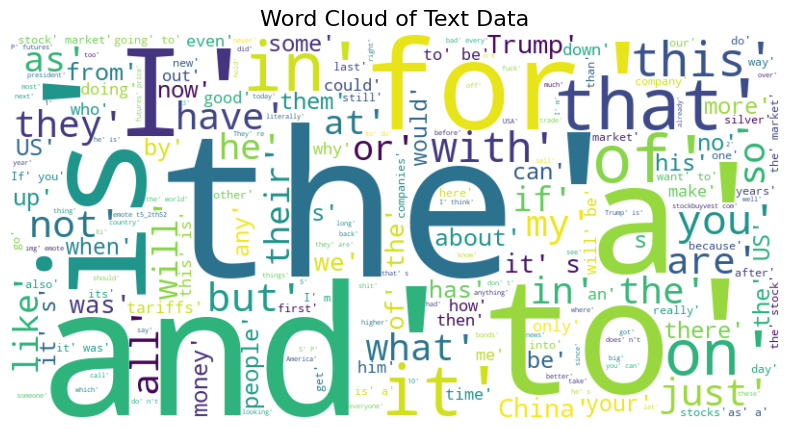

In [49]:
text_data = ' '.join(df['unigrams'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # remove axes
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here